In [2]:
from os import listdir # Biblioteca responsável por capturar informações de arquivos dentro de um diretório.

import os 

import pathlib

import numpy as np # Cálculos numéricos

import pandas as pd # Criação e manipulação de dataframes.

import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.

import wave # Biblioteca com métodos que permitam converter dados raw em .wav

import struct # Biblioteca responsável por trabalhar com dados raw.

import librosa # A python package for music and audio analysis.

import librosa.display # librosa package visualization.

import random # Random functions.


# Split do dataset em treino e teste
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut

import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras import backend as K

import csv

# Métricas de erro para validação do modelo gerado. 
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix


pd.set_option('display.max_rows', None) # Mostra todas as linhas do dataframe.
pd.set_option('display.max_columns', None) # Mostra todas as colunas do dataframe.

In [3]:
# Checar disponibilidade de GPUS:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5

Num GPUs Available:  1


In [4]:
%matplotlib inline

# Preparação do DataFrame

In [5]:
df = pd.read_csv("/home/rtiagos/PAIC/Gait_Project/GaitDataset/Triagem/full_Dataset/dataframe/gait_dataset.csv")

In [6]:
df.head()

profile_ID Gait Status  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  \
0           1          MM    -702     -68     910    1703    1896    1764   
1           1          MN   -3581   -4655   -3121   -1726    -216    1781   
2           1          MP   -5418   -4456   -4391   -3160    -943     144   
3           1          MS   10608    9584    9256    9384    9868    9701   
4           2          MM     381     494     348     658     605     529   

   Xac006  Xac007  Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  \
0    1891    2102    2127    2507    2820    3043    3202    3116    3154   
1    1607    -273   -1382   -1475   -1618   -1746   -1859   -1791   -1672   
2    -802    -189    1239    2138    2355    1216    1757    2944    3764   
3   10049   10253   10193   10196   10167   10035    9021    8960    8332   
4     568    1064     896     247     338     384     518    1237    1415   

   Xac015  Xac016  Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  \
0    3684    3623    5383    6687    7671    8700    9988   10665   10693   
1   -1342    -949    -935    -885    -288    -606      72    1135     714   
2    2239   -1264   -1487    -990    2916    3915    3050    4347    6872   
3   -6195   28394   28766  -22716    7324   29498   24645   -8979  -25836   
4    1684    1463    1356    1250    1208    1495    2286    2408    2742   

   Xac024  Xac025  Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  \
0   11149   11636   10034   -7287  -26909  -19601    5958    8969    -942   
1     991    1497    1554    2632    2448    2319    2289    2145    2083   
2   10110   11748   13050   12057   11569   11397   11986   11661   11445   
3  -21115   -4268    5394    5907    3365    2691    -386   -3566   -4766   
4    1869     573    -384     657     865    -789   -2978   -5740   -8395   

   Xac033  Xac034  Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  \
0   -4681    1704    5704    4495    1310     166    -896   -2227   -1675   
1    2292    1997    1550    1747    1686    1764    1643    1218    1228   
2   11741   12129   11734   11478   10937   10481    9934    9393    8952   
3   -4024   -2564   -1418    -944    -273    1042     969    -524   -2886   
4  -10432   -9845   -2107    9999    9889    7824    9652   10055    3393   

   Xac042  Xac043  Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  \
0      48     706    -229   -1506   -1402    -489    -181    -261     -22   
1    1450    1729    1765    2302    2233    1916    2128    2795    2686   
2    8655    7897    6427    4218    2166    1498    1001     634     349   
3   -4227   -3537   -2720    -656     699     542    -241     480     843   
4   -3674  -11796   -9270   -7188  -10351   -9514   -7574   -6060   -4189   

   Xac051  Xac052  Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  \
0     106    -300     -54     -11     191     387     780    1137     828   
1    1743    2024    1860    -668   -2069   -3099   -5204   -9375   -9698   
2     284     305     210    -198  -11240  -32176  -31907  -19306    8925   
3     198    -170    -245    -377    -214    -300    -180    -100     477   
4   -2603   -1967   -2028   -1770   -1172    -474     220     705     920   

   Xac060  Xac061  Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  \
0     902     843     605     601     469     575     898    1207    1609   
1   -4032    8704   10506    6388    4405    1555     102     832     928   
2  -31448   23943  -15386  -21317  -12340    -325   10043   14078    6413   
3     602      42      -8     717    1536    1695    1608    1910    2351   
4    1918    3060    3233    2848    2241    2163    2066    2680    3358   

   Xac069  Xac070  Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  \
0    1770    1831    1604    1462    1568    1847    2120    2332    2325   
1     749    3690    8169    3806    1072     595     322    -839   -1494   
2    -205    -485     848     143   -1921   -2841     324    3955   

In [7]:
# Transformar a feature categórica 'Gait Status' em resposta binária. Normal = 1 -> I = 0 e vice-versa.
df_with_dummies = pd.get_dummies(df, columns= ['Gait Status'], prefix = 'Gait_Status', drop_first= True)
df_with_dummies.head()


profile_ID  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  \
0           1    -702     -68     910    1703    1896    1764    1891    2102   
1           1   -3581   -4655   -3121   -1726    -216    1781    1607    -273   
2           1   -5418   -4456   -4391   -3160    -943     144    -802    -189   
3           1   10608    9584    9256    9384    9868    9701   10049   10253   
4           2     381     494     348     658     605     529     568    1064   

   Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  \
0    2127    2507    2820    3043    3202    3116    3154    3684    3623   
1   -1382   -1475   -1618   -1746   -1859   -1791   -1672   -1342    -949   
2    1239    2138    2355    1216    1757    2944    3764    2239   -1264   
3   10193   10196   10167   10035    9021    8960    8332   -6195   28394   
4     896     247     338     384     518    1237    1415    1684    1463   

   Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  \
0    5383    6687    7671    8700    9988   10665   10693   11149   11636   
1    -935    -885    -288    -606      72    1135     714     991    1497   
2   -1487    -990    2916    3915    3050    4347    6872   10110   11748   
3   28766  -22716    7324   29498   24645   -8979  -25836  -21115   -4268   
4    1356    1250    1208    1495    2286    2408    2742    1869     573   

   Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  \
0   10034   -7287  -26909  -19601    5958    8969    -942   -4681    1704   
1    1554    2632    2448    2319    2289    2145    2083    2292    1997   
2   13050   12057   11569   11397   11986   11661   11445   11741   12129   
3    5394    5907    3365    2691    -386   -3566   -4766   -4024   -2564   
4    -384     657     865    -789   -2978   -5740   -8395  -10432   -9845   

   Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  \
0    5704    4495    1310     166    -896   -2227   -1675      48     706   
1    1550    1747    1686    1764    1643    1218    1228    1450    1729   
2   11734   11478   10937   10481    9934    9393    8952    8655    7897   
3   -1418    -944    -273    1042     969    -524   -2886   -4227   -3537   
4   -2107    9999    9889    7824    9652   10055    3393   -3674  -11796   

   Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  \
0    -229   -1506   -1402    -489    -181    -261     -22     106    -300   
1    1765    2302    2233    1916    2128    2795    2686    1743    2024   
2    6427    4218    2166    1498    1001     634     349     284     305   
3   -2720    -656     699     542    -241     480     843     198    -170   
4   -9270   -7188  -10351   -9514   -7574   -6060   -4189   -2603   -1967   

   Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  \
0     -54     -11     191     387     780    1137     828     902     843   
1    1860    -668   -2069   -3099   -5204   -9375   -9698   -4032    8704   
2     210    -198  -11240  -32176  -31907  -19306    8925  -31448   23943   
3    -245    -377    -214    -300    -180    -100     477     602      42   
4   -2028   -1770   -1172    -474     220     705     920    1918    3060   

   Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  \
0     605     601     469     575     898    1207    1609    1770    1831   
1   10506    6388    4405    1555     102     832     928     749    3690   
2  -15386  -21317  -12340    -325   10043   14078    6413    -205    -485   
3      -8     717    1536    1695    1608    1910    2351    2178    2731   
4    3233    2848    2241    2163    2066    2680    3358    3233    3212   

   Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  \
0    1604    1462    1568    1847    2120    2332    2325    2463    2239   
1    8169    3806    1072     595     322    -839   -1494   -2619   -2728   
2     848     143   -1921   -2841     324   

In [8]:
tempo_drop = df_with_dummies.loc[:,'Tempo000':'Tempo499']

df_for_modeling= df_with_dummies.drop(['profile_ID', 'Gait_Status_MN', 'Gait_Status_MS', 'Gait_Status_MP'],
                         axis = 1) # Elimina as feature 'profile_ID' e Gait_Status_N

df_for_modeling = df_for_modeling.drop(tempo_drop, axis = 1) # Elimina as features de step time.

df_for_modeling.head()  # df_pca contém apenas os atributos agora

Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  Xac008  \
0    -702     -68     910    1703    1896    1764    1891    2102    2127   
1   -3581   -4655   -3121   -1726    -216    1781    1607    -273   -1382   
2   -5418   -4456   -4391   -3160    -943     144    -802    -189    1239   
3   10608    9584    9256    9384    9868    9701   10049   10253   10193   
4     381     494     348     658     605     529     568    1064     896   

   Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  Xac017  \
0    2507    2820    3043    3202    3116    3154    3684    3623    5383   
1   -1475   -1618   -1746   -1859   -1791   -1672   -1342    -949    -935   
2    2138    2355    1216    1757    2944    3764    2239   -1264   -1487   
3   10196   10167   10035    9021    8960    8332   -6195   28394   28766   
4     247     338     384     518    1237    1415    1684    1463    1356   

   Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  Xac026  \
0    6687    7671    8700    9988   10665   10693   11149   11636   10034   
1    -885    -288    -606      72    1135     714     991    1497    1554   
2    -990    2916    3915    3050    4347    6872   10110   11748   13050   
3  -22716    7324   29498   24645   -8979  -25836  -21115   -4268    5394   
4    1250    1208    1495    2286    2408    2742    1869     573    -384   

   Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  Xac035  \
0   -7287  -26909  -19601    5958    8969    -942   -4681    1704    5704   
1    2632    2448    2319    2289    2145    2083    2292    1997    1550   
2   12057   11569   11397   11986   11661   11445   11741   12129   11734   
3    5907    3365    2691    -386   -3566   -4766   -4024   -2564   -1418   
4     657     865    -789   -2978   -5740   -8395  -10432   -9845   -2107   

   Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  Xac044  \
0    4495    1310     166    -896   -2227   -1675      48     706    -229   
1    1747    1686    1764    1643    1218    1228    1450    1729    1765   
2   11478   10937   10481    9934    9393    8952    8655    7897    6427   
3    -944    -273    1042     969    -524   -2886   -4227   -3537   -2720   
4    9999    9889    7824    9652   10055    3393   -3674  -11796   -9270   

   Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  Xac053  \
0   -1506   -1402    -489    -181    -261     -22     106    -300     -54   
1    2302    2233    1916    2128    2795    2686    1743    2024    1860   
2    4218    2166    1498    1001     634     349     284     305     210   
3    -656     699     542    -241     480     843     198    -170    -245   
4   -7188  -10351   -9514   -7574   -6060   -4189   -2603   -1967   -2028   

   Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  Xac062  \
0     -11     191     387     780    1137     828     902     843     605   
1    -668   -2069   -3099   -5204   -9375   -9698   -4032    8704   10506   
2    -198  -11240  -32176  -31907  -19306    8925  -31448   23943  -15386   
3    -377    -214    -300    -180    -100     477     602      42      -8   
4   -1770   -1172    -474     220     705     920    1918    3060    3233   

   Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  Xac071  \
0     601     469     575     898    1207    1609    1770    1831    1604   
1    6388    4405    1555     102     832     928     749    3690    8169   
2  -21317  -12340    -325   10043   14078    6413    -205    -485     848   
3     717    1536    1695    1608    1910    2351    2178    2731    3659   
4    2848    2241    2163    2066    2680    3358    3233    3212    2975   

   Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  Xac080  \
0    1462    1568    1847    2120    2332    2325    2463    2239    2088   
1    3806    1072     595     322    -839   -1494   -2619   -2728   -1505   
2     143   -1921   -2841     324    3955    3968    2312     575   

# Geração de Imagens a partir de Aúdio

Considerações:

1. Análise dinâmica da densidade espectral de energia. Essa densidade pode ser visualizada pela distribuição de cores em um gráfico da Frequência vs Tempo que representam, na verdade, uma distribuição de potência/amplitude do sinal ao longo do Eixo X e Y.

In [9]:
def display_an_spectogram(path, fs, n_fft):
    
    y, sr = librosa.load(path, sr = fs, mono = True)
    print("Fs = {}".format(sr))
    
    D = librosa.stft(y, n_fft = n_fft, window = 'hann', hop_length= 2)
    plt.figure(figsize=(10,10))
    
    plt.subplot(3,1,1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref = np.max), sr=sr, 
                             y_axis = 'log', x_axis = 'time')
    plt.subplot(3,1,2)
    librosa.display.specshow(librosa.power_to_db(np.abs(D)**2, ref= np.max), y_axis = 'linear', sr=sr,
                             x_axis = 'time')
    
    plt.subplot(3,1,3)
    S = librosa.feature.melspectrogram(S=np.abs(D), n_mels = 64, sr = sr)
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis = 'linear', sr=sr)

Fs = 200


/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


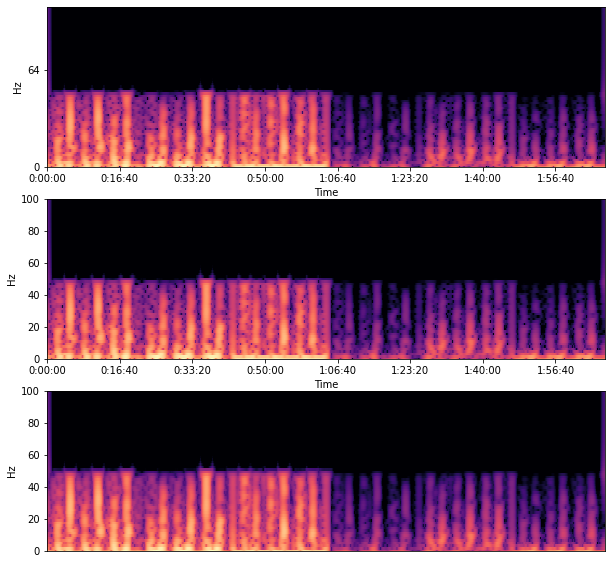

In [10]:
e_file1 = '/home/rtiagos/PAIC/Gait_Project/GaitDataset/Triagem/wavFiles/MS/0013MS_Gait.wav'

display_an_spectogram(path = e_file1, fs = 200, n_fft = 128)

# Treino com Arquiteturas CNN

In [11]:
def create_callbacks():
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            filepath = 'model.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1),
        keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 100, verbose = 1)
    ]
    return callbacks

def train_model():
    history = model.fit_generator(train_generator, steps_per_epoch = nb_train_samples // BATCH_SIZE,
                                 epochs = epochs, 
                                 validation_data = validation_generator,
                                 validation_steps = nb_validation_samples // BATCH_SIZE,
                                 callbacks = callbacks_list,
                                 verbose = 1)
    return history

In [12]:
def plot_train_overview():
    fig, ax = plt.subplots(1, 2, figsize=(10,10))
    
    fig.suptitle('Model Metrics History Overview')
    
    ax[0].plot(history.history['loss'], color = 'b', label = 'Training Loss')
    ax[0].plot(history.history['val_loss'], color = 'r', label = 'Validation Loss', axes = ax[0])
    ax[0].set_title('Loss and Validation Loss History')
    legend = ax[0].legend(loc= 'best', shadow = True)
    
    
    ax[1].plot(history.history['accuracy'], color = 'b', label = ' Training Accuraccy')
    ax[1].plot(history.history['val_accuracy'], color = 'r',  label = 'Validation Accuracy')
    ax[1].set_title('Accuraccy and Validation Accuracy')
    legend = ax[1].legend(loc='best', shadow = True)

In [13]:
from sklearn.model_selection import learning_curve
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'

In [14]:
def train_pretty_plot_for_paper(title, history_dict, path, epochs_x):
    
    fig = plt.figure(figsize = (7,7), dpi = 100)
    
    test_acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    
    plt.plot(epochs_x, test_acc_values, color = 'r', label = 'Acurácia de Treinamento')
    plt.plot(epochs_x, val_acc_values, color = 'g', label = 'Acurácia de Validação Cruzada')
    
    plt.title(title, color = 'black')
    plt.ylim((0.3, 1.01))
    plt.xlabel("Épocas", color = "black")
    plt.ylabel("Acurácia", color = "black")
    
    plt.legend()
    
    plt.savefig(path)

    plt.show()

## Arquitetura CNN Básica
### Características
1. Arquitetura CNN implementada para figuras em 3 canais de cores (RGB)

Image Shape: (360, 720, 3)


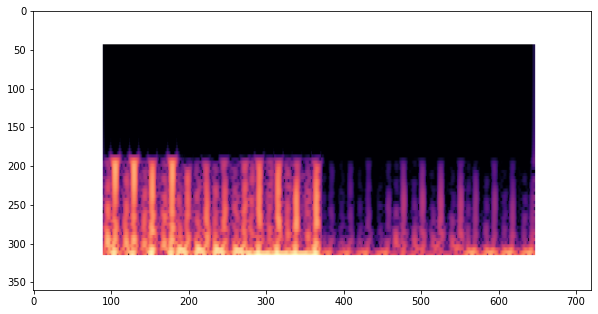

In [12]:
path = '/home/rtiagos/PAIC/Gait_Project/GaitDataset/Triagem/pngFiles/MM/0002MM_Gait.png'

img_keras = image.load_img(path)
img_keras = image.img_to_array(img_keras)
img_shape = img_keras.shape
print("Image Shape: {}".format(img_shape))


plt.figure(figsize=(10,10))
plt.imshow(img_keras/255.)

In [16]:
img_size = 360
img_shape = (360, 720)
classes = 'MM MS MN MP'.split()
num_classes = 4

In [17]:
model = Sequential()

model.add(Conv2D(70, kernel_size = (6,6), input_shape=(360, 360, 3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(60, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(50, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(16, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

#Compilar o modelo
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 360, 360, 70)      7630      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 180, 180, 70)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 60)      16860     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 90, 90, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 88, 88, 50)        27050     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 44, 44, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 16)       

In [21]:
TRAINING_DIR = '/home/rtiagos/PAIC/Gait_Project/GaitDataset/Triagem/pngFiles/'
BATCH_SIZE = 16

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(360,360), shuffle=False, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(360,360), shuffle=False, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples

Found 672 images belonging to 4 classes.
Found 168 images belonging to 4 classes.


In [22]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

RuntimeError: Physical devices cannot be modified after being initialized

In [22]:
epochs = 50
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // BATCH_SIZE)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
42/42 [==============================] - 7s 124ms/step - loss: 1.4987 - accuracy: 0.1548 - val_loss: 1.3864 - val_accuracy: 0.2625
Epoch 2/50
42/42 [==============================] - 5s 120ms/step - loss: 1.3882 - accuracy: 0.2262 - val_loss: 1.3864 - val_accuracy: 0.2625
Epoch 3/50
42/42 [==============================] - 5s 121ms/step - loss: 1.3873 - accuracy: 0.2262 - val_loss: 1.3866 - val_accuracy: 0.2125
Epoch 4/50
42/42 [==============================] - 5s 121ms/step - loss: 1.3875 - accuracy: 0.2500 - val_loss: 1.3866 - val_accuracy: 0.2125
Epoch 5/50
42/42 [==============================] - 5s 122ms/step - loss: 1.3870 - accuracy: 0.2500 - val_loss: 1.3864 - val_accuracy: 0.2125
Epoch 6/50
42/42 [==============================] - 5s 122ms/step - loss: 1.3872 - accuracy: 0.2143 - val_loss: 1.3864 - val_accuracy: 0.2625
Epoch 7/50
42/42 [==============================] - 5s 125ms/step - loss: 1.3877 - accuracy: 0.2262 - val_loss: 1.3866 - val_accuracy: 0.2125
Epoch 

In [53]:
# Vendo alguns reports
# Usando sklearn
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print(validation_generator.classes)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = classes
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Confusion Matrix
[[ 0  0  0 42]
 [ 0  0  0 42]
 [ 0  0  0 42]
 [ 0  0  0 42]]
Classification Report
              precision    recall  f1-score   support

          MM       0.00      0.00      0.00        42
          MS       0.00      0.00      0.00        42
          MN       0.00      0.00      0.00        42

/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Arquitetura CNN Básica
### Características
1. Arquitetura CNN implementada para figuras em 1 canal de cor (Escala de Cinzas)

In [32]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,1), input_shape=(360, 360, 1),
                 activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))


#model.add(MaxPooling2D(pool_size = (2,2)))

#model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
#model.add(MaxPooling2D(pool_size = (2,2)))


#model.add(Conv2D(64, kernel_size = (1,1), activation = 'tanh'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(16, kernel_size = (1,5), activation = 'relu', padding = 'same'))




model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#opt = keras.optimizers.SGD(lr=0.0003, momentum=0.9, nesterov=True)

#Compilar o modelo
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 360, 360, 32)      192       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 180, 180, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 180, 180, 16)      2576      
_________________________________________________________________
flatten_3 (Flatten)          (None, 518400)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               66355328  
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 516       
Total params: 66,358,612
Trainable params: 66,358,612
Non-trainable params: 0
__________________________________________

In [25]:
TRAINING_DIR = '/home/rtiagos/PAIC/Gait_Project/GaitDataset/Triagem/pngFiles/'

epochs = 50
BATCH_SIZE = 32
seed = random.randint(1, 1000)

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(360, 360), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training", color_mode = 'grayscale')

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(360, 360), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation", color_mode='grayscale')
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples

Found 672 images belonging to 4 classes.
Found 168 images belonging to 4 classes.


In [26]:
callbacks_list = create_callbacks()

In [27]:
history = train_model()

Epoch 1/50
21/21 [==============================] - 4s 145ms/step - loss: 4.6908 - accuracy: 0.2024 - val_loss: 1.3840 - val_accuracy: 0.2625

Epoch 00001: val_accuracy improved from -inf to 0.26250, saving model to model.h5
Epoch 2/50
21/21 [==============================] - 3s 137ms/step - loss: 1.3928 - accuracy: 0.2500 - val_loss: 1.3827 - val_accuracy: 0.2625

Epoch 00002: val_accuracy did not improve from 0.26250
Epoch 3/50
21/21 [==============================] - 3s 139ms/step - loss: 1.3865 - accuracy: 0.2500 - val_loss: 1.3803 - val_accuracy: 0.2625

Epoch 00003: val_accuracy did not improve from 0.26250
Epoch 4/50
21/21 [==============================] - 3s 143ms/step - loss: 1.3845 - accuracy: 0.2708 - val_loss: 1.3757 - val_accuracy: 0.3375

Epoch 00004: val_accuracy improved from 0.26250 to 0.33750, saving model to model.h5
Epoch 5/50
21/21 [==============================] - 3s 140ms/step - loss: 1.3775 - accuracy: 0.2470 - val_loss: 1.3675 - val_accuracy: 0.3000

Epoch 00

21/21 [==============================] - 3s 141ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.4038 - val_accuracy: 0.7250

Epoch 00041: val_accuracy improved from 0.71875 to 0.72500, saving model to model.h5
Epoch 42/50
21/21 [==============================] - 3s 138ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.4487 - val_accuracy: 0.7125

Epoch 00042: val_accuracy did not improve from 0.72500
Epoch 43/50
21/21 [==============================] - 3s 140ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.4388 - val_accuracy: 0.7125

Epoch 00043: val_accuracy did not improve from 0.72500
Epoch 44/50
21/21 [==============================] - 3s 139ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4657 - val_accuracy: 0.7063

Epoch 00044: val_accuracy did not improve from 0.72500
Epoch 45/50
21/21 [==============================] - 3s 139ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4824 - val_accuracy: 0.7063

Epoch 00045: val_accuracy did not improve 

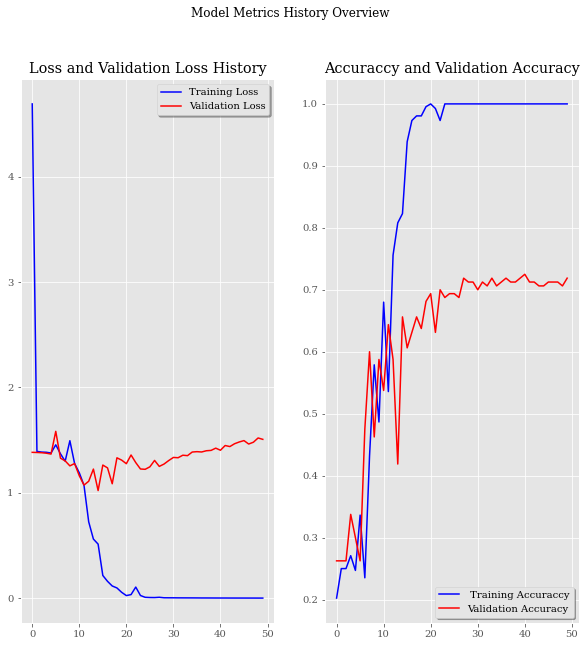

In [28]:
plot_train_overview()

In [29]:
from sklearn.model_selection import learning_curve
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'

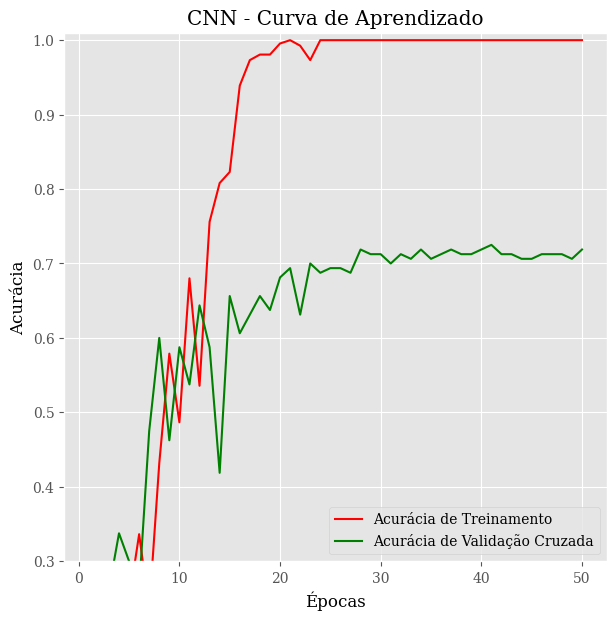

In [30]:
title = "CNN - Curva de Aprendizado"
path  = '/home/rtiagos/PAIC/Gait_Project/Documentação/Results/CNN_LearningCurve.png'
epochs_x = range(1, 50 + 1)

train_pretty_plot_for_paper(title, history.history, path, epochs_x)

## Arquitetura FNN Simples


In [46]:
#Uma rede DNN
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(img_shape[0],img_shape[1],1)))
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(1000))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#opt = keras.optimizers.SGD(lr=0.0003, momentum=0.9, nesterov=True)
opt = keras.optimizers.Adam(lr=0.00006)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 259200)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               25920100  
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              101000    
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [49]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/home/rtiagos/PAIC/Gait_Project/GaitDataset/Triagem/pngFiles/'
BATCH_SIZE = 16

seed = random.randint(1, 1000)

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(img_shape[0],img_shape[1]), shuffle=False, seed= seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training", color_mode='grayscale')

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(img_shape[0],img_shape[1]), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation", color_mode='grayscale')
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples

Found 672 images belonging to 4 classes.
Found 168 images belonging to 4 classes.


In [50]:
# Vendo alguns reports
# Usando sklearn
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print(validation_generator.classes)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = classes
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Confusion Matrix
[[ 0  0  0 42]
 [ 0  0  0 42]
 [ 0  0  0 42]
 [ 0  0  0 42]]
Classification Report
              precision    recall  f1-score   support

          MM       0.00      0.00      0.00        42
          MS       0.00      0.00      0.00        42
          MN       0.00      0.00      0.00        42

/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [91]:
TRAINING_DIR = '/home/trs/Gait_Project/GaitDataset/Triagem/pngFiles/'

epochs = 100
BATCH_SIZE = 6
seed = random.randint(1, 1000)

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(img_shape[0],img_shape[1]), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(img_shape[0],img_shape[1]), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples

Found 672 images belonging to 4 classes.
Found 168 images belonging to 4 classes.


In [92]:
learning_rate = 0.0001


# Loading MobileNet without top layer
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(img_shape[0], img_shape[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)
x = Dense(1280, activation='relu',  kernel_initializer=glorot_uniform(seed))(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freezing MobileNet layers
for layer in base_model.layers:
    layer.trainable=False
    
optimizer = Adam(lr=learning_rate)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [93]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator.classes), 
            train_generator.classes)
class_weights

array([1., 1., 1., 1.])

In [94]:
train_model()

Epoch 1/100
112/112 [==============================] - 12s 85ms/step - loss: 1.7946 - accuracy: 0.2704 - val_loss: 1.3951 - val_accuracy: 0.2738

Epoch 00001: val_accuracy did not improve from 0.71429
Epoch 2/100
112/112 [==============================] - 9s 77ms/step - loss: 1.6447 - accuracy: 0.2474 - val_loss: 1.3704 - val_accuracy: 0.2619

Epoch 00002: val_accuracy did not improve from 0.71429
Epoch 3/100
112/112 [==============================] - 9s 77ms/step - loss: 1.5173 - accuracy: 0.2276 - val_loss: 1.4220 - val_accuracy: 0.1429

Epoch 00003: val_accuracy did not improve from 0.71429
Epoch 4/100
112/112 [==============================] - 9s 76ms/step - loss: 1.4643 - accuracy: 0.2782 - val_loss: 1.4064 - val_accuracy: 0.2321

Epoch 00004: val_accuracy did not improve from 0.71429
Epoch 5/100
112/112 [==============================] - 9s 77ms/step - loss: 1.4273 - accuracy: 0.2541 - val_loss: 1.4144 - val_accuracy: 0.1726

Epoch 00005: val_accuracy did not improve from 0.71429